<a href="https://colab.research.google.com/github/QingtaoDu/Machine-Learning-Project/blob/master/should_this_loan_be_approved_or_denied.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction

Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. If you're inspired to dig deeper, click the blue "Fork Notebook" button at the top of this kernel to begin editing.


Summary

I am a Junior Data Analyst and this is my very first kaggle notebook. The main goal of this analysis is to get an understanding of the dataset. I would be very grateful for comments on EDA and data preprocessing parts. For prediction I tried xgboost without any tunning. The last part will be updated.

Data

The original dataset from the U.S. Small Business Administration (SBA)

Exploratory Analysis

To begin this exploratory analysis, first import libraries and define functions for plotting the data using matplotlib. Depending on the data, not all plots will be made. (Hey, I'm just a simple kerneling bot, not a Kaggle Competitions Grandmaster!)


In [0]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

There is 1 csv file in the current version of the dataset:


In [0]:
#!pip install kaggle
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [0]:
import json
token = {"username":"tonydudu","key":"d66ceaa5708cdfc798f26e9af8bd8dc3"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
  json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [0]:
!kaggle config set -n path -v /content

- path is now set to: /content


In [0]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)    2GB  2020-04-25 00:03:33          58925  
divyansh22/us-border-crossing-data                          US Border Crossing Data                               2MB  2020-04-19 09:38:10            257  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                          142MB  2020-04-29 22:47:23           5922  
baltacifatih/turkish-lira-banknote-dataset                  Turkish Lira Banknote Dataset                         3GB  2020-04-19 14:48:39             21  
doaaalsenani/usa-cers-dataset                               US C

In [0]:
!kaggle datasets list -s mirbektoktogaraev

ref                                                       title                                    size  lastUpdated          downloadCount  
--------------------------------------------------------  ---------------------------------------  ----  -------------------  -------------  
mirbektoktogaraev/should-this-loan-be-approved-or-denied  Should This Loan be Approved or Denied?  46MB  2020-03-17 23:36:35            272  
mirbektoktogaraev/madrid-real-estate-market               Madrid real estate market                 1MB  2020-04-18 09:18:18              9  


In [0]:
!kaggle datasets download -d mirbektoktogaraev/should-this-loan-be-approved-or-denied -p /content

 97% 45.0M/46.4M [00:02<00:00, 16.9MB/s]
100% 46.4M/46.4M [00:02<00:00, 17.9MB/s]


In [0]:
!unzip \*.zip

Archive:  should-this-loan-be-approved-or-denied.zip
  inflating: SBAnational.csv         
  inflating: Should This Loan be Approved or Denied A Large Dataset with Class Assignment Guidelines.pdf  


In [0]:
import pandas as pd
df = pd.read_csv('SBAnational.csv')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [0]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [0]:
df.dataframeName = 'SBAnational.csv'

In [0]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [0]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

Now you're ready to read in the data and use the plotting functions to visualize the data.



Let's check 1st file: /kaggle/input/SBAnational.csv/SBAnational.csv

In [0]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# SBAnational.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = df
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 899164 rows and 27 columns


Let's take a quick look at what the data looks like:

In [0]:
df1.head(5)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


Distribution graphs (histogram/bar graph) of sampled columns:

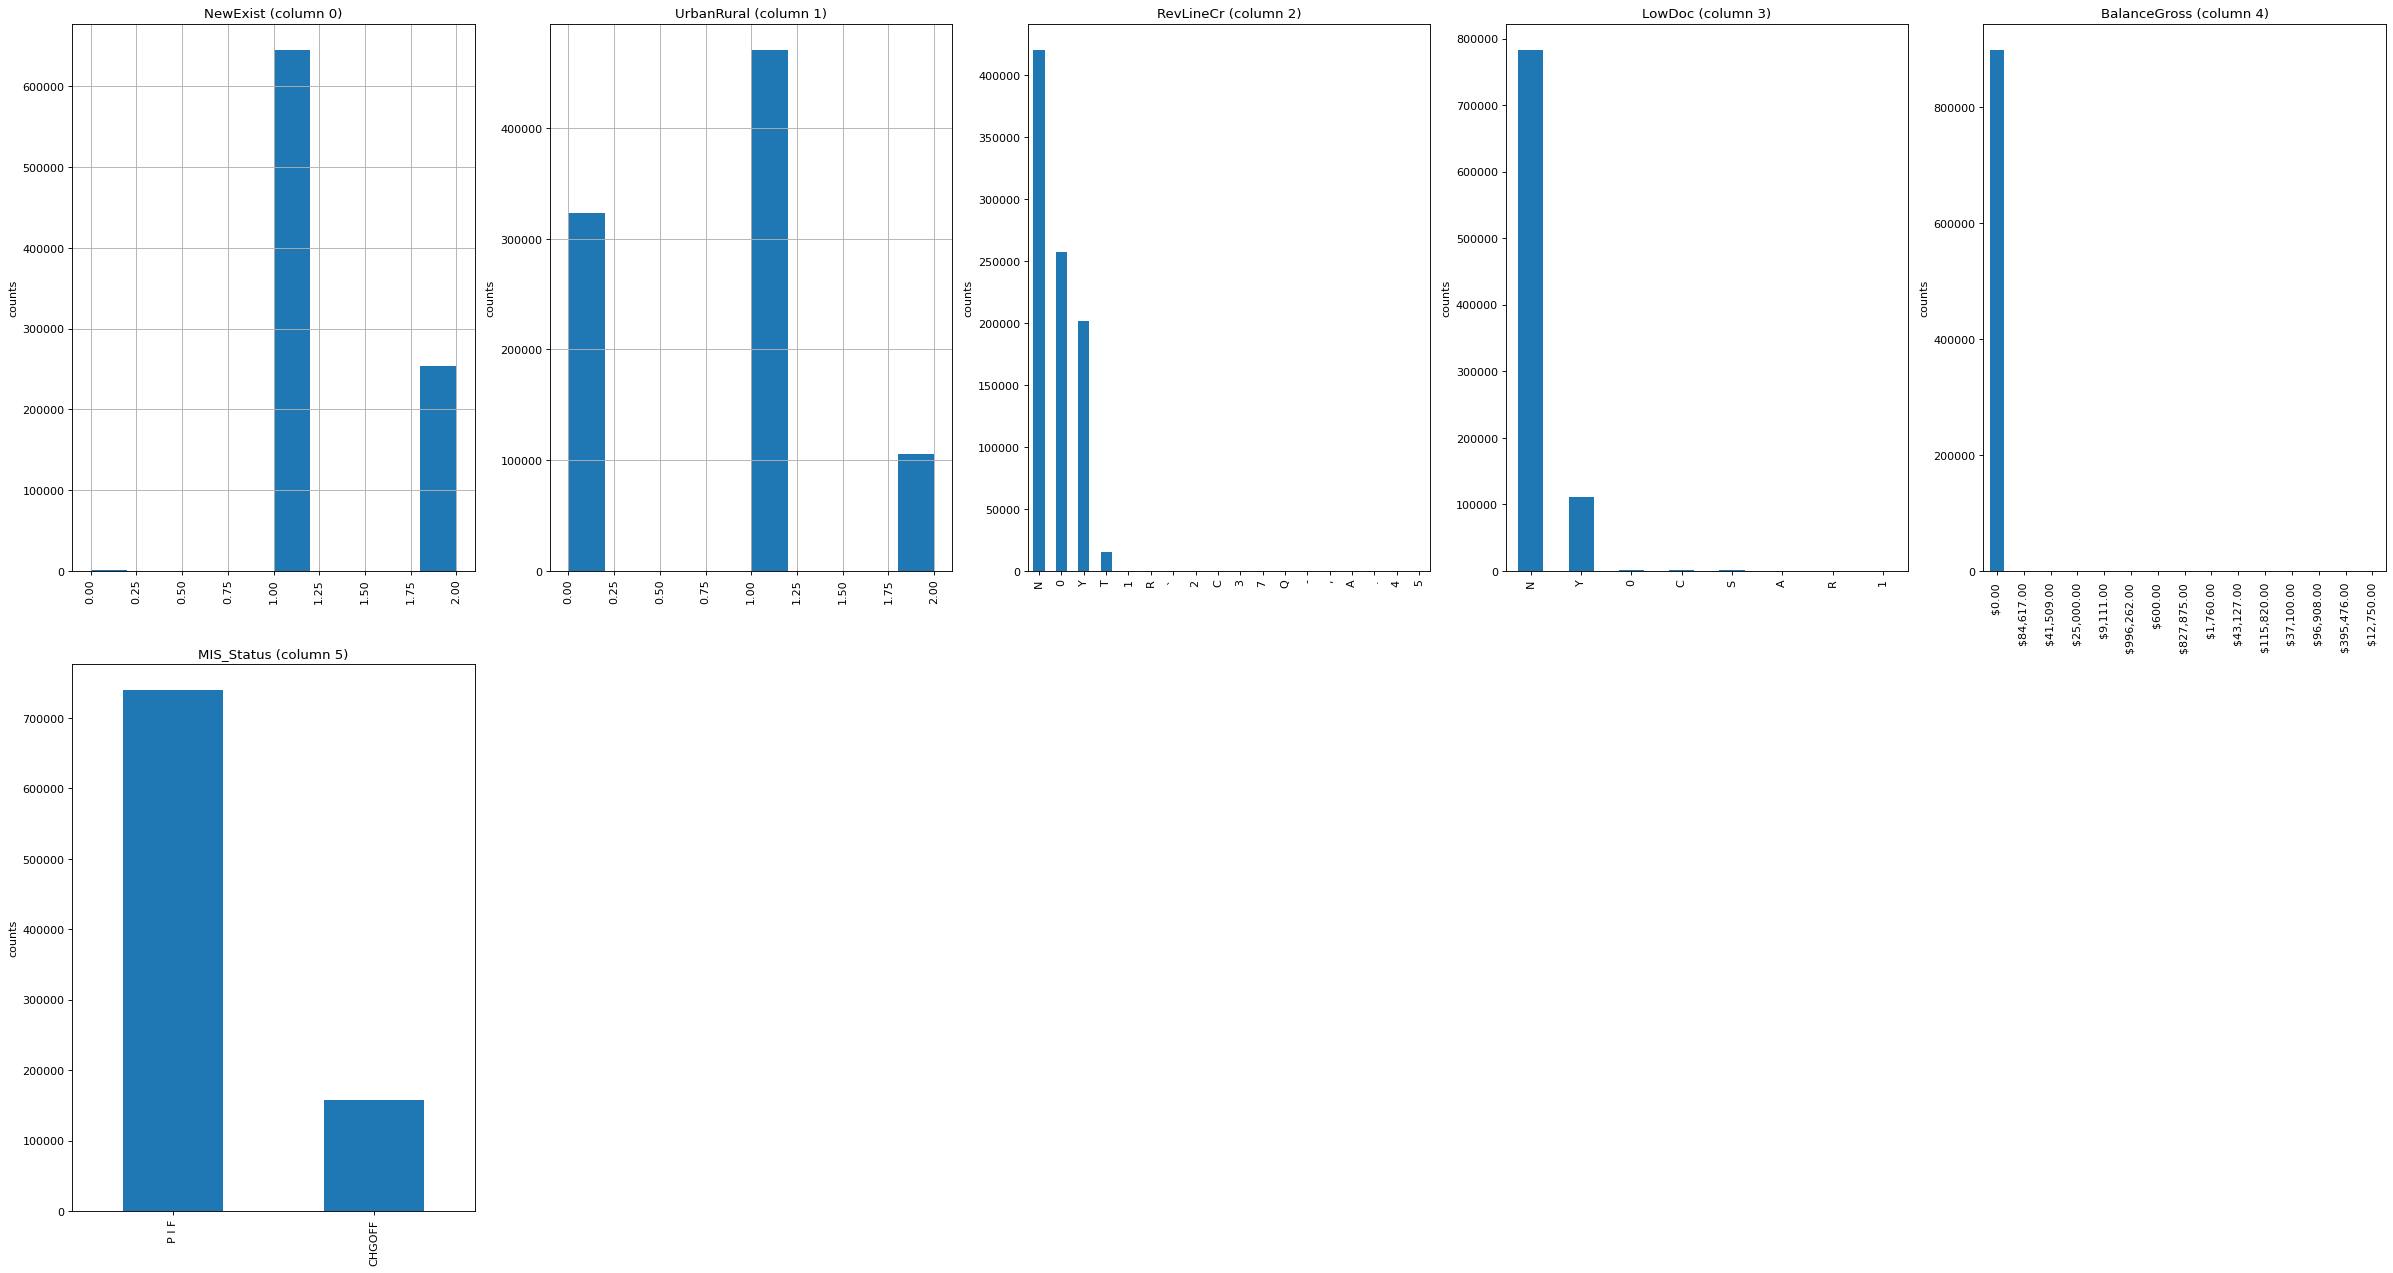

In [0]:
plotPerColumnDistribution(df1, 10, 5)

Correlation matrix:

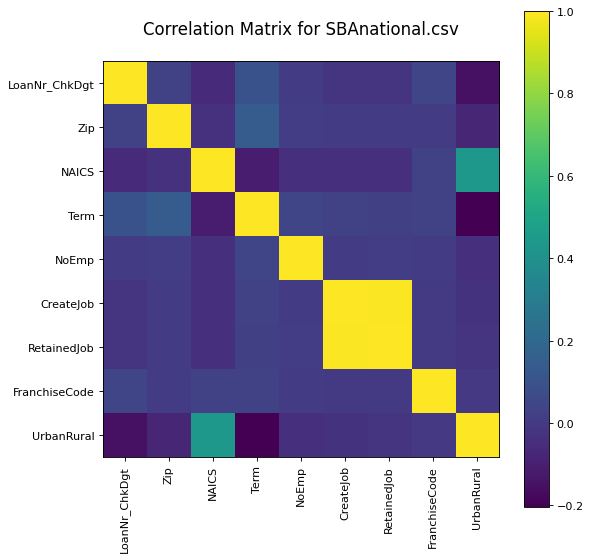

In [0]:
plotCorrelationMatrix(df1, 8)

Scatter and density plots:

In [0]:
#plotScatterMatrix(df1, 20, 10)

Conclusion

This concludes your starter analysis! To go forward from here, click the blue "Fork Notebook" button at the top of this kernel. This will create a copy of the code and environment for you to edit. Delete, modify, and add code as you please. Happy Kaggling!

Summary

I am a Junior Data Analyst and this is my very first kaggle notebook. The main goal of this analysis is to get an understanding of the dataset. I would be very grateful for comments on EDA and data preprocessing parts. For prediction I tried xgboost without any tunning. The last part will be updated.

Data

The original dataset from the U.S. Small Business Administration (SBA)

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import os
import math
import sys

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!pip install uszipcode
import uszipcode
from uszipcode import SearchEngine
search = SearchEngine()

     |████████████████████████████████| 378kB 3.3MB/s 
     |████████████████████████████████| 81kB 8.3MB/s 
     |████████████████████████████████| 122kB 11.4MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
  Created wheel for autopep8: filename=autopep8-1.5.2-py2.py3-none-any.whl size=43754 sha256=df1c088f1cea1e5f375841b41451c33f2d51ad819bffec75ed24b641d8681c98
  Stored in directory: /root/.cache/pip/wheels/b0/b0/ba/2ab847c5da4ba60ba4682ba33fcc0783c956cda5ff22b2037f
Successfully built autopep8
Start downloading data for simple zipcode database, total size 9MB ...
  1 MB finished ...
  2 MB finished ...
  3 MB finished ...
  4 MB finished ...
  5 MB finished ...
  6 MB finished ...
  7 MB finished ...
  8 MB finished ...
  9 MB finished ...
  10 MB finished ...
  Complete!


In [0]:
#Read csv file
credit = df

In [0]:
#Quick overview of our Dataset and variables
credit.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [0]:
credit.shape

(899164, 27)

In [0]:
#Deleting duplicates if any
credit = credit.drop_duplicates(keep = 'first')
#Shape of the data: 899164 rows and 27 columns
credit.shape

(899164, 27)

So there is no duplicates droped.

In [0]:
#List of columns:
print(credit.dtypes.index)

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')


In [0]:
#Summary of data frame (count, mean, standart deviation, min, quartiles, max)
credit.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312759,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [0]:
#NA observation. A lot of NAs :(
credit.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [0]:
#Our target is to predict "MIS_Value". According to the document, "MIS_Status" has 2 variables: 
#Loan status charged off = CHGOFF, Paid in full = PIF
Counter(credit.MIS_Status).keys() # We have: "PIF", CHGOFF, nan in this column

dict_keys(['P I F', 'CHGOFF', nan])

In [0]:
Counter(credit.MIS_Status).values() # "PIF": 739609, CHGOFF: 157558, nan:1997
#Quite imbalanced. We will try to not lose our rows with CHGOFF values while we are cleaning the dataset.

dict_values([739609, 157558, 1997])

In [0]:
#####FIRST Dealing with NAs.##### 
#Name, City, and State

# 4 columns belong to Borrower information: Name, City, State, and Zip.
#Name is unique and useless and we can drop an entire column.
credit = credit.drop(axis =1, columns = ['Name'])

In [0]:
credit.shape

(899164, 26)

In [0]:
#Next are City and State. As you can see, there are no NAs in Zip, so we can easily impute City and State uzing Zip values
#Creating conditions for a loop
cond = (credit.City.isnull()|credit.State.isnull())

In [0]:
cond.value_counts()

False    899120
True         44
dtype: int64

In [0]:
missing_rows = credit[cond].index
missing_rows

Int64Index([ 35517,  42535,  49244, 177891, 243450, 243452, 264664, 270263,
            270265, 270268, 270270, 270277, 270284, 306274, 326169, 328526,
            342177, 342185, 342928, 342938, 342946, 342951, 344784, 350109,
            351072, 366139, 366158, 367007, 378899, 379174, 385418, 410929,
            410933, 437782, 437788, 437793, 437804, 437818, 564191, 570342,
            745271, 869948, 871847, 885335],
           dtype='int64')

In [0]:
#I will go through loop and impute City and State using zearch.by_zipcode function.
for i in missing_rows:
    zipcode = search.by_zipcode(credit.iloc[i,3]) # 3 corresponds to Zip code
    credit.iloc[i,1] = zipcode.major_city # 1 -> City
    credit.iloc[i,2] = zipcode.state # 2 -> State

#Check how NAs were imputed. We still have 4 NAs. I have looked through them. One zipcode = 0 
#and the other 3 are not in the list of search.by_zipcode function. I think we can delete these rows.
credit.isnull().sum()

LoanNr_ChkDgt             0
City                      4
State                     4
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [0]:
#And, of course, drop 4 rows with NAs in City and State columns 
credit = credit.dropna(axis =0, subset=['City','State','MIS_Status'])

In [0]:
credit.shape

(897163, 26)

In [0]:
#Next features with a lot of NAs are Bank and BankState. 
#I would like to check if State of borrower = BankState. 
#If so we can just delete one of them.
equal = 0
non_equal = 0
for i in credit.index:
    if credit.State[i] == credit.BankState[i]:
        equal = equal + 1
    else:
        non_equal = non_equal +1
print(equal, non_equal)
# Sad. The assumption is incorrect, 473949 cases coincide, while 425215 cases do not.

473434 423729


In [0]:
#Since our goal is to define a default case, I will check if there are default cases in the rows where the 
#Bank Name and Bank State are unknown. 
cond_1 = credit.Bank.isnull()|credit.BankState.isnull()

In [0]:
cond_1.value_counts()

False    895651
True       1512
dtype: int64

In [0]:
missing_rows_1 = credit[cond_1].index
missing_rows_1

Int64Index([   407,    680,  16108,  18188,  27779,  29247,  31135,  33663,
             34140,  34582,
            ...
            879218, 880178, 880844, 885560, 886790, 888026, 888681, 897114,
            897474, 897749],
           dtype='int64', length=1512)

In [0]:
yes = 0
no = 0
for i in missing_rows_1:
    if credit.MIS_Status[i] == 'CHGOFF':
        yes = yes+1
    else:
        no = no +1
print(yes,no)
#Not bad, 72 cases against 1494. I'm still not sure if I need the columns with the State of the Bank and Bank name.
#We can delete 1494 rows with not default cases, since the data is imbalanced. We'll see.

72 1440


In [0]:
#Feature - 'ChgOffDate' corresponds to the date when a loan was declared to be in default. 


In [0]:
credit.ChgOffDate.isna().sum()

734727

In [0]:
credit.shape[0] - 736465

160698

In [0]:
credit[credit.ChgOffDate.isna()!=True].ChgOffDate.value_counts()

13-Mar-10    733
20-Feb-10    611
30-Jan-10    517
6-Feb-10     460
6-Mar-10     420
            ... 
11-Sep-04      1
20-Aug-93      1
1-Mar-00       1
10-Apr-98      1
17-May-95      1
Name: ChgOffDate, Length: 6443, dtype: int64

In [0]:
#I made little investigation about ChgOffDate feature: we have 162699 paid cases and 736465 NAs 
#seems like if credit is paid then there is an NA in this featue. default date = default case.


In [0]:
#So, we will just drop this feature.
credit = credit.drop(axis =1, columns = ['ChgOffDate'])

In [0]:
credit.shape

(897163, 25)

In [0]:
#Next, I want to clean my dependent variable - MIS_Status drop NAs and change dtype from object to integer.
#1 - grant a loan (low risk of default), 0 - do not grant a loan (high risk of default)

loan_status = {'P I F': 1,'CHGOFF': 0} 
credit.MIS_Status = [loan_status[item] for item in credit.MIS_Status] 

Counter(credit.MIS_Status).keys() 

dict_keys([1, 0])

In [0]:
Counter(credit.MIS_Status).values() # count values 739607 = "1" against 157556 = "0"

dict_values([739607, 157556])

In [0]:
#According to the document we have, 5 columns are with currency values. I want to change all of them to the float.
#This will help us see the corealation of currency to our target value.
currency = [19,20,22,23,24] #To convert to float.

In [0]:
credit[credit.columns[currency]].head(5)

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,"$60,000.00",$0.00,$0.00,"$60,000.00","$48,000.00"
1,"$40,000.00",$0.00,$0.00,"$40,000.00","$32,000.00"
2,"$287,000.00",$0.00,$0.00,"$287,000.00","$215,250.00"
3,"$35,000.00",$0.00,$0.00,"$35,000.00","$28,000.00"
4,"$229,000.00",$0.00,$0.00,"$229,000.00","$229,000.00"


In [0]:

for i in currency:
    credit[credit.columns[i]] = credit[credit.columns[i]].replace('[\$,]', '', regex=True).astype(float) 

In [0]:
credit[credit.columns[currency]].head(5)

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.0,0.0,0.0,60000.0,48000.0
1,40000.0,0.0,0.0,40000.0,32000.0
2,287000.0,0.0,0.0,287000.0,215250.0
3,35000.0,0.0,0.0,35000.0,28000.0
4,229000.0,0.0,0.0,229000.0,229000.0


In [0]:
credit[credit.columns[currency]].dtypes

DisbursementGross    float64
BalanceGross         float64
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
dtype: object

In [0]:
#Looks good.
credit.isnull().sum()

LoanNr_ChkDgt           0
City                    0
State                   0
Zip                     0
Bank                 1505
BankState            1512
NAICS                   0
ApprovalDate            0
ApprovalFY              0
Term                    0
NoEmp                   0
NewExist              134
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4520
LowDoc               2578
DisbursementDate     2175
DisbursementGross       0
BalanceGross            0
MIS_Status              0
ChgOffPrinGr            0
GrAppv                  0
SBA_Appv                0
dtype: int64

In [0]:
#Next feature is New Exist. According to the document
#1 = Existing business, 2 = New business 
#And at this moment we have 134 NAs
Counter(credit.NewExist).keys() # unique values

dict_keys([2.0, 1.0, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [0]:
Counter(credit.NewExist).values() # count values 
#In fact, we have more than 136 NAs. 
#252559 = New business
#643443 = Existing business
#1027 = "0" whatever it means
#134 = nan as we can see from previous output

dict_values([252559, 643443, 1027, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
#We have a feature 'RetainedJob' - From the document, it shows number of jobs retained. 
#I can assume that if loan retains some jobs it is an existing business.
# I will create a condition and iterate through loop to 
#assign new value "1" which is Existing business to those rows where Retained Job is >= 1
cond_2 = credit[(credit['NewExist'] == 0) & (credit['RetainedJob'] >=1)].index


In [0]:
cond_2

Int64Index([  4664,   7102,  43542,  54085,  62103,  70090,  72727, 159846,
            170936, 189521,
            ...
            818075, 824799, 833868, 856428, 858315, 859361, 864594, 868354,
            879332, 882387],
           dtype='int64', length=153)

In [0]:
for i in cond_2:
    credit.loc[i,['NewExist']] = 1 

In [0]:
#Next we will do the same thing with another condition: isnull and Retained Job >=1
cond_3 = credit[(credit.NewExist.isnull()) & (credit['RetainedJob'] >=1)].index


In [0]:
cond_3

Int64Index([395231, 399884, 400052, 400300, 400370, 400506, 400769, 402560,
            402605, 402785,
            ...
            462861, 463949, 464945, 466405, 466736, 470308, 471939, 498244,
            512594, 611835],
           dtype='int64', length=115)

In [0]:
for i in cond_3:
    credit.loc[i,['NewExist']] = 1  

In [0]:
#I will check if there are default cases in these rows.
credit[(credit['NewExist'] == 0) & (credit['MIS_Status'] == 0)].shape #60 rows


(60, 25)

In [0]:
credit[(credit.NewExist.isnull()) & (credit['MIS_Status'] == 0)] #1 row
#Our goal is to impute 61 rows in NewExist and we can delete others.

,LoanNr_ChkDgt,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
433834,4203385009,SITKA,AK,99835,NORTHRIM BANK,AK,561499,11-Aug-10,2010,82,1,NaN,1,0,0,2,N,N,11-Aug-10,15000.0,0.0,0,10718.0,15000.0,12750.0


In [0]:
#Ok, we continue our investigation.
#Interesting column - "FranchiseCode":
#Nofranchise = 0 or 1
#Franchise code = other numbers
#My assumption is if Franchise code != 0 and != 1, maybe it is a New Business, not the existing one.
#Someone gets a franchise and opens a Starbucks in the city.
Counter(credit.FranchiseCode).keys() #51732 Franchise Loans

dict_keys([1, 0, 15100, 19755, 10656, 22470, 16267, 21425, 3490, 66320, 77175, 21400, 10495, 50949, 20550, 950, 78760, 84025, 50564, 68060, 10676, 10397, 23997, 51570, 70405, 81612, 36002, 16920, 67759, 81965, 39598, 75982, 90725, 9802, 17205, 23379, 80600, 22475, 10602, 78325, 401, 40472, 73675, 17998, 39700, 21420, 23000, 72590, 79140, 68021, 65925, 71456, 10622, 8380, 44081, 10528, 6410, 52000, 83882, 21780, 10734, 60227, 38510, 77174, 89769, 75385, 10615, 10556, 9050, 42520, 68020, 45455, 66910, 9800, 81630, 10720, 6560, 27765, 65140, 85100, 64985, 64960, 53250, 24850, 75710, 10643, 59450, 25650, 56480, 50040, 62343, 35706, 52956, 55120, 36680, 16310, 3515, 61400, 90703, 46413, 1350, 49952, 43700, 68150, 50028, 4516, 84535, 3512, 39238, 35300, 75985, 56837, 45479, 33570, 46408, 20728, 70130, 67750, 88660, 61901, 37000, 10729, 79950, 73900, 66690, 33550, 67400, 10691, 62753, 85150, 75900, 35705, 61900, 82360, 8047, 74820, 30207, 10200, 21790, 825, 34459, 15668, 19118, 90900, 43351, 

In [0]:
Counter(credit.FranchiseCode).values() # 845431 non Franchise Loans 

dict_values([637395, 208036, 70, 311, 11, 615, 34, 169, 219, 149, 6, 78, 1, 11, 223, 63, 3373, 173, 1034, 73, 34, 1, 3, 17, 51, 238, 7, 204, 70, 13, 129, 10, 4, 56, 308, 56, 21, 45, 3, 16, 12, 2, 212, 606, 88, 369, 111, 347, 659, 80, 122, 45, 42, 3, 47, 435, 57, 576, 87, 1001, 108, 7, 105, 241, 166, 79, 27, 13, 378, 6, 1921, 26, 134, 68, 191, 10, 107, 36, 194, 39, 5, 14, 220, 536, 202, 190, 122, 715, 31, 28, 5, 267, 40, 97, 164, 195, 11, 98, 2, 47, 260, 292, 14, 147, 1, 114, 196, 199, 39, 48, 7, 22, 49, 134, 9, 17, 145, 420, 44, 228, 53, 17, 98, 161, 21, 16, 7, 49, 20, 3, 160, 74, 21, 88, 7, 30, 3, 21, 7, 5, 28, 8, 18, 21, 20, 44, 5, 33, 138, 21, 100, 62, 4, 104, 13, 161, 68, 35, 31, 28, 140, 19, 261, 23, 19, 2, 10, 227, 57, 36, 45, 46, 104, 365, 4, 51, 54, 9, 68, 1, 29, 108, 34, 66, 9, 2, 7, 27, 77, 75, 5, 38, 146, 4, 62, 24, 85, 60, 150, 6, 127, 26, 125, 49, 2, 7, 1, 2, 9, 7, 12, 7, 275, 15, 32, 42, 174, 68, 4, 63, 47, 52, 16, 34, 94, 30, 197, 27, 39, 91, 51, 25, 2, 19, 196, 6, 2, 74

In [0]:
#Let's check our assumption, if Franchise Code is with digits = New business
cond_4 = credit[(credit['FranchiseCode'] != 0) & (credit['FranchiseCode'] != 1)] #Lets store our Franchise cases


In [0]:
cond_4.shape

(51732, 25)

In [0]:
Counter(cond_4.NewExist).values()
# We have:
# 27940 rows - New Business
# 23725 rows - Exisitng Business
# 67 rows - NA in Existing Business
# Our assumption is not correct!

dict_values([27940, 23725, 67])

In [0]:
Counter(cond_4.NewExist).keys()

dict_keys([2.0, 1.0, 0.0])

In [0]:
credit.NewExist.value_counts(dropna=False)

1.0    643711
2.0    252559
0.0       874
NaN        19
Name: NewExist, dtype: int64

In [0]:
# I think I will stop my investigation on this stage and will drop NAs in NewExist feature.
#Before it was 134 NAs + 1027 with zero value, after imputation we have 19 rows = NA and 874 = "0". In total, 893.

In [0]:


#First, I will assign NA to 0 values and drop all NAs in this feature.
cond_5 = credit[(credit['NewExist'] == 0)].index

In [0]:
cond_5

Int64Index([   142,    170,    185,    211,    223,    246,    254,    260,
               269,    274,
            ...
            892984, 893537, 894289, 894665, 894976, 895872, 895976, 896382,
            896633, 897212],
           dtype='int64', length=874)

In [0]:

for i in cond_5:
    credit.loc[i,['NewExist']] = np.nan #11 corresponds to NewExist column
    
credit = credit.dropna(axis =0, subset=['NewExist'])

In [0]:
credit.shape

(896270, 25)

In [0]:
#Much better.
credit.isnull().sum()

LoanNr_ChkDgt           0
City                    0
State                   0
Zip                     0
Bank                 1503
BankState            1510
NAICS                   0
ApprovalDate            0
ApprovalFY              0
Term                    0
NoEmp                   0
NewExist                0
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4517
LowDoc               2578
DisbursementDate     2174
DisbursementGross       0
BalanceGross            0
MIS_Status              0
ChgOffPrinGr            0
GrAppv                  0
SBA_Appv                0
dtype: int64

In [0]:
#I decided to drop Bank Name and Bank State on this stage. My idea was to use state as a predictor, because 
#different states have different economic environments.
#According to documentation, State of Borrower is a right Feature to use for this goal.
#Also, Bank Name (> 5000 names) as a Borrowers Name is a unique value, so we can delete it, too.
#Columns "Disbursment Date", "DisbursementGross", "BalanceGross" and "ChgOffPrinGr" 
#contain information that is important after default is declared, so we can't use these columns for predicting
#default risks. I delete them.
credit = credit.drop(axis =1, columns = ['Bank', 'BankState', 'DisbursementDate', 'DisbursementGross', 
                                         'BalanceGross','ChgOffPrinGr'])

In [0]:
credit.shape

(896270, 19)

In [0]:
#Now we have only 2 features left: LowDoc and RevLineCr,
#We will start from - LowDoc. Loan Program: Y = Yes, N = No
Counter(credit.LowDoc).keys()

dict_keys(['Y', 'N', 'C', '1', nan, 'S', 'R', 'A', '0'])

In [0]:
Counter(credit.LowDoc).values()

dict_values([110046, 780227, 757, 1, 2578, 603, 74, 495, 1489])

In [0]:
#I made some research about "LowDoc program". So, these are less than 150 000$ short-term loans. 
#To get this loan you need less documents
#And it was a very popular loan program in the USA in 2000-2007. And seems like it's a strong predictor
#I will select rows with this condition and check values in LowDoc feauture
#But first I should convert ApprovalDate from object to DateTime format
from datetime import date
credit['ApprovalDate'] = credit['ApprovalDate'].astype(str)
credit['ApprovalDate'] = pd.to_datetime(credit['ApprovalDate'])

In [0]:
credit.ApprovalDate[:5]

0   1997-02-28
1   1997-02-28
2   1997-02-28
3   1997-02-28
4   1997-02-28
Name: ApprovalDate, dtype: datetime64[ns]

In [0]:
cond_6 = credit[(credit['LowDoc'] != "Y") & (credit['LowDoc'] != "N")]
cond_6.head(5)
#5997 rows with NAs and other different values. (1404)
#Seems like it's a very important value, we will not drop rows with NAs. 
#We will try to impute LowDoc value using other features

,LoanNr_ChkDgt,City,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
7413,1050326003,ST. NAZIANZ,WI,54232,333111,2006-02-16,2006,240,130,1.0,0,130,1,2,0,C,1,1306000.0,1306000.0
23459,1176096001,DEMING,NM,88031,722110,2006-02-27,2006,120,7,2.0,0,0,1,1,N,C,1,160000.0,120000.0
30877,1232806006,EL PASO,TX,79938,722213,2006-03-02,2006,120,5,2.0,0,0,8023,1,N,C,1,189000.0,141750.0
35740,1272576003,AVON LAKE,OH,44012,811192,2006-03-06,2006,252,2,2.0,0,0,1,1,N,C,1,1200000.0,900000.0
36376,1277995003,Martinsville,VA,24112,484110,2005-04-22,2005,83,1,1.0,2,1,1,2,Y,C,1,250000.0,125000.0


In [0]:
cond_6.shape

(5997, 19)

In [0]:
Counter(cond_6.LowDoc).keys() #dict_keys(['C', '1', nan, 'S', 'R', 'A', '0'])

dict_keys(['C', '1', nan, 'S', 'R', 'A', '0'])

In [0]:
Counter(cond_6.LowDoc).values() #dict_values([757, 1, 2578, 603, 74, 494, 1490])


dict_values([757, 1, 2578, 603, 74, 495, 1489])

In [0]:
#Let's see how many rows in cond_6 are default cases
Counter(cond_6.MIS_Status).values()
#4420 rows - not default
#1577 - default cases. 
#Would be nice to impute these rows with values.

dict_values([4421, 1576])

In [0]:
#Let's examine LowDoc loans and Not LowDoc loans and try to find any patterns
low_doc = credit[credit['LowDoc'] == "Y"]

In [0]:
low_doc['GrAppv'].describe() # 75% of loans are =< $100 000

count     110046.000000
mean       68661.091816
std        37671.332829
min         4000.000000
25%        40000.000000
50%        60000.000000
75%       100000.000000
max      1000000.000000
Name: GrAppv, dtype: float64

In [0]:
low_doc['Term'].describe() #75% or loans <= 93 months

count    110046.000000
mean         87.698026
std          45.809016
min           0.000000
25%          60.000000
50%          84.000000
75%          93.000000
max         511.000000
Name: Term, dtype: float64

In [0]:
Counter(low_doc.MIS_Status).keys()

dict_keys([1, 0])

In [0]:
Counter(low_doc.MIS_Status).values() #MIS_Status 1 = 100153, 0 = 9893 (1 is 10 times more than 0)

dict_values([100153, 9893])

In [0]:
#Let's check if we have some rows in cond_6 with these conditions
cond_7 = cond_6[(cond_6['GrAppv'] <= 100000) & (cond_6['Term'] <= 93) & (cond_6['MIS_Status'] == 1)]
cond_7
#Ok, we can assign 1 to 1565 rows in LowDoc program. It's better to then just delete the rows.

,LoanNr_ChkDgt,City,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
49151,1380186001,EL PASO,TX,79912,531210,2006-03-16,2006,60,2,1.0,0,0,1,1,Y,C,1,50000.0,37500.0
66702,1503586004,EL PASO,TX,79936,541310,2006-03-27,2006,60,4,2.0,0,0,1,1,N,C,1,30000.0,25500.0
71166,1535204008,EL PASO,TX,79915,0,1997-09-10,1997,84,6,1.0,2,4,1,0,N,C,1,45000.0,36000.0
75024,1562824001,EL PASO,TX,79905,0,1997-09-19,1997,60,1,2.0,0,1,1,0,N,C,1,11000.0,8800.0
96102,1712804002,EL PASO,TX,79902,0,1997-12-02,1998,68,3,1.0,2,1,1,0,N,C,1,25000.0,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860458,9254924001,EL PASO,TX,79936,561730,2005-11-09,2006,60,19,1.0,0,0,1,1,Y,C,1,50000.0,42500.0
862620,9286494008,EL PASO,TX,79935,323110,2005-11-17,2006,36,13,1.0,0,0,1,1,Y,C,1,100000.0,85000.0
870592,9398784006,EL PASO,TX,79901,541810,2005-12-08,2006,75,8,1.0,0,0,1,1,N,C,1,75000.0,63750.0
879369,9541544008,EL PASO,TX,79922,444220,2005-12-29,2006,72,1,2.0,0,0,1,1,N,C,1,60000.0,51000.0


In [0]:
cond_7.shape

(1565, 19)

In [0]:
#I will iterate a loop to assign value 'Y' to these rows in column 15 (LowDoc)
for i in cond_7.index:
    credit.loc[i,['LowDoc']] = 'Y'

In [0]:
#Examine results 4432 rows. I will drop other values
cond_8 = credit[(credit['LowDoc'] != "Y") & (credit['LowDoc'] != "N")]
cond_8

,LoanNr_ChkDgt,City,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
7413,1050326003,ST. NAZIANZ,WI,54232,333111,2006-02-16,2006,240,130,1.0,0,130,1,2,0,C,1,1306000.0,1306000.0
23459,1176096001,DEMING,NM,88031,722110,2006-02-27,2006,120,7,2.0,0,0,1,1,N,C,1,160000.0,120000.0
30877,1232806006,EL PASO,TX,79938,722213,2006-03-02,2006,120,5,2.0,0,0,8023,1,N,C,1,189000.0,141750.0
35740,1272576003,AVON LAKE,OH,44012,811192,2006-03-06,2006,252,2,2.0,0,0,1,1,N,C,1,1200000.0,900000.0
36376,1277995003,Martinsville,VA,24112,484110,2005-04-22,2005,83,1,1.0,2,1,1,2,Y,C,1,250000.0,125000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886336,9718424003,EL PASO,TX,79901,541620,2006-01-19,2006,60,16,1.0,0,0,1,1,Y,C,1,200000.0,150000.0
886363,9719294003,EL PASO,TX,79922,326199,2006-01-19,2006,84,71,1.0,0,0,1,1,N,C,1,2000000.0,1500000.0
887812,9755534000,EL PASO,TX,79925,238990,2006-01-23,2006,240,15,1.0,4,0,1,1,0,C,1,131000.0,131000.0
891829,9844504004,EL PASO,TX,79902,621310,2006-02-02,2006,84,3,2.0,0,0,1,1,N,C,1,135000.0,114750.0


In [0]:
#I will assign nan to all values not equal to "Y" and "N" and than drop NAs
for i in cond_8.index:
    credit.loc[i,'LowDoc'] = np.nan

credit = credit.dropna(axis =0, subset=['LowDoc'])

In [0]:
credit.shape

(891838, 19)

In [0]:
#Next is RevLineCr. According to the documentation, revolving line of credit: Y = Yes, N = No
Counter(credit.RevLineCr).keys()


dict_keys(['N', '0', 'Y', 'T', nan, '`', ',', '1', 'C', '3', '2', 'R', '7', 'A', '5', '.', '4', '-', 'Q'])

In [0]:
Counter(credit.RevLineCr).values()

dict_values([415133, 256971, 200190, 15191, 4289, 11, 1, 22, 2, 1, 6, 14, 1, 1, 1, 1, 1, 1, 1])

In [0]:
#Again we will select rows not equal to Y and N
cond_9 = credit[(credit['RevLineCr'] != "Y") & (credit['RevLineCr'] != "N")] #277188 rows

In [0]:
Counter(cond_9.MIS_Status).keys() # 1:231537 0:44978 rows.

dict_keys([1, 0])

In [0]:
Counter(cond_9.MIS_Status).values() # 1:231537 0:44978 rows.

dict_values([231537, 44978])

In [0]:
#We will select all rows with RevLine Yes and RevLine No and try to find any patterns to impute NAs
RevLine_yes = credit[credit['RevLineCr'] == "Y"]
RevLine_no = credit[credit['RevLineCr'] == "N"]

In [0]:
RevLine_yes.shape

(200190, 19)

In [0]:
RevLine_no.shape

(415133, 19)

In [0]:
RevLine_yes.Term.describe() #highest term 312

count    200190.000000
mean         61.533938
std          27.128074
min           0.000000
25%          39.000000
50%          75.000000
75%          84.000000
max         312.000000
Name: Term, dtype: float64

In [0]:
RevLine_no.Term.describe() #highest term 527

count    415133.000000
mean        125.915061
std          82.077373
min           0.000000
25%          60.000000
50%          84.000000
75%         180.000000
max         527.000000
Name: Term, dtype: float64

In [0]:
#number of emp
RevLine_no.NoEmp.describe()

count    415133.000000
mean         14.430156
std          87.034973
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max        9999.000000
Name: NoEmp, dtype: float64

In [0]:
RevLine_yes.NoEmp.describe()

count    200190.000000
mean          6.845717
std          40.030355
min           0.000000
25%           2.000000
50%           3.000000
75%           6.000000
max        8000.000000
Name: NoEmp, dtype: float64

In [0]:
#I can't find any clear pattern and there are a lot of NAs in this row, so I decided to delete this column on this stage.
#Also, I found out that column #0 is unique, too. It's an ID number of Identifier – Primary key. We will drop it, too.
#We don't need columns with dates anymore: ApprovalDate, ApprovalFY
#SBA_Appv - a guaranteed ammount from the US government. Useless, too. 

In [0]:
credit = credit.drop(axis =1, columns = ['Zip','LoanNr_ChkDgt','ApprovalDate', 'ApprovalFY','RevLineCr','SBA_Appv'])

In [0]:
credit.shape

(891838, 13)

In [0]:
credit.City.value_counts()# 2 = 125348 1 = 292878 
#We can try to create a feature according to cities (Small, Big, Medium), but maybe later for improving the model. 
#On this stage I think we can drop this column, too many unique values.

LOS ANGELES                       11521
HOUSTON                           10180
NEW YORK                           7827
CHICAGO                            5987
MIAMI                              5594
                                  ...  
WRIGHT-PATTERSON AIR FORCE BAS        1
SCOTTSDALL                            1
Poynette                              1
SCOSSDALE                             1
SOUTH PELHAM                          1
Name: City, Length: 32423, dtype: int64

In [0]:
credit.State.value_counts() 
#My idea is to create new features using States and NAICS. For each State and for each Sector of business I will give points.
#Lower default rate - higher points.

CA    129723
TX     69667
NY     57264
FL     41035
PA     34517
OH     32398
IL     29481
MA     24979
MN     24263
NJ     23916
WA     23058
GA     22157
WI     20922
MO     20547
CO     20499
MI     20410
UT     18689
AZ     17470
NC     14119
IN     14005
MD     13183
VA     13016
CT     12022
NH     12001
IA     11953
KS     11403
OR     10970
OK      9882
LA      9525
ID      9407
TN      9297
RI      8922
MT      8688
AL      8304
NV      7955
KY      7676
MS      7619
NE      6333
AR      6296
NM      5965
ME      5911
SC      5513
VT      5413
ND      5220
SD      4404
HI      3582
WV      3266
WY      2825
AK      2393
DE      2166
DC      1609
Name: State, dtype: int64

In [0]:
#Function extracts first 2 digits from variable, if variables = 0, returns 0
def first_two(d):
    if d <= 0:
        return 0
    return (d // 10 ** (int(math.log(d, 10)) - 1))

In [0]:

#Function returns points according to the given rate. Lower rate, higher points.
def point_def(rate):
    if rate <= 12:
        return 5
    elif  12 < rate <= 17: 
        return 4
    elif 17 < rate <= 21:
        return 3
    elif 21 < rate <= 25:
        return 2
    elif rate > 25:
        return 1

In [0]:
#Function returns points according to the default rate of each sector.
def apply_score(i):
    sector_default = {21 : 8, 11 : 9, 55 : 10, 62:10, 22:14, 92:15,54:19, 42:19,31:19,32:16,33:14,81:20,71:21,72:22,44:22,45:23,23:23,56:24,61:24,51:25,48:27,49:23,52:28,53:29}
    if i > 0:
        defrate = None
        if i in sector_default:
            defrate = sector_default[i]
            return point_def(defrate)
    return 0

In [0]:
#Once the functions are ready I will create a new column - "Sector_Points" and apply functions to get points
credit['Sector_Points'] = credit.NAICS.apply(first_two).apply(apply_score)

In [0]:
credit.head(5)

,City,State,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,MIS_Status,GrAppv,Sector_Points
0,EVANSVILLE,IN,451120,84,4,2.0,0,0,1,0,Y,1,60000.0,2
1,NEW PARIS,IN,722410,60,2,2.0,0,0,1,0,Y,1,40000.0,2
2,BLOOMINGTON,IN,621210,180,7,1.0,0,0,1,0,N,1,287000.0,5
3,BROKEN ARROW,OK,0,60,2,1.0,0,0,1,0,Y,1,35000.0,0
4,ORLANDO,FL,0,240,14,1.0,7,7,1,0,N,1,229000.0,0


In [0]:
#Next, we will give points to each State.
#I indicated only the highest and the lowest default rates in the library and assigned def rate = 18 (mean) to the states left
#Function for the state scores 
def apply_score_state(i):
    state_default = {'MT':8, 'ND': 8, 'WY':8, 'SD':8, 'VT':8, 'ME':10,'NH':10, 'NM':10, 'AK':10, 'WA':13,'AD':13, 'MN':13, 
                     'WI':13, 'IA':13,'NE':13, 'KS':13, 'MA':13,'CT':13,'RI':13,'PA':13, 'NV':23, 'IL':23, 'MI':23, 'KY':23,
                     'GA':23, 'FL':28}
    temp_defrate = None
    average_def_rate = 18
    if i in state_default:
        temp_defrate = state_default[i]
        return point_def(temp_defrate)
    return point_def(average_def_rate)

In [0]:
#Apply function and create new feature
credit['State_Points'] = credit.State.apply(apply_score_state)

In [0]:
credit.head(5)

,City,State,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,MIS_Status,GrAppv,Sector_Points,State_Points
0,EVANSVILLE,IN,451120,84,4,2.0,0,0,1,0,Y,1,60000.0,2,3
1,NEW PARIS,IN,722410,60,2,2.0,0,0,1,0,Y,1,40000.0,2,3
2,BLOOMINGTON,IN,621210,180,7,1.0,0,0,1,0,N,1,287000.0,5,3
3,BROKEN ARROW,OK,0,60,2,1.0,0,0,1,0,Y,1,35000.0,0,3
4,ORLANDO,FL,0,240,14,1.0,7,7,1,0,N,1,229000.0,0,1


In [0]:
#I think on this stage we can drop columns:"City","State" and "NAICS"
#Because when I dummify these columns, especially State, 50 more features will be created.
credit = credit.drop(axis =1, columns = ['City', 'State', 'NAICS'])

In [0]:
credit.shape

(891838, 12)

In [0]:
credit.head(5)

,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,MIS_Status,GrAppv,Sector_Points,State_Points
0,84,4,2.0,0,0,1,0,Y,1,60000.0,2,3
1,60,2,2.0,0,0,1,0,Y,1,40000.0,2,3
2,180,7,1.0,0,0,1,0,N,1,287000.0,5,3
3,60,2,1.0,0,0,1,0,Y,1,35000.0,0,3
4,240,14,1.0,7,7,1,0,N,1,229000.0,0,1


In [0]:
#Next, I want to change some Columns this way:
#Term to Years 12 = 1 etc
#CreateJob to IscreateJob (1,0)
#Retained Job to IsRetainedJob (1,0)
#FranchiseCode to IsFranchise (1,0)

#For this I will create a simple function, which I can apply to several columns and create new features.
def yes_no(i):
    if i > 0:
        return 1
    return 0

credit.Term = credit.Term//12
credit['IscreateJob'] = credit.CreateJob.apply(yes_no)
credit['IsRetained'] = credit.RetainedJob.apply(yes_no)
credit['IsFranchise'] = credit.FranchiseCode.apply(yes_no)

In [0]:
credit.head(5)

,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,MIS_Status,GrAppv,Sector_Points,State_Points,IscreateJob,IsRetained,IsFranchise
0,7,4,2.0,0,0,1,0,Y,1,60000.0,2,3,0,0,1
1,5,2,2.0,0,0,1,0,Y,1,40000.0,2,3,0,0,1
2,15,7,1.0,0,0,1,0,N,1,287000.0,5,3,0,0,1
3,5,2,1.0,0,0,1,0,Y,1,35000.0,0,3,0,0,1
4,20,14,1.0,7,7,1,0,N,1,229000.0,0,1,1,1,1


In [0]:
#I will recode LowDoc Yes and No to 1 and 0.
def lowdoc(i):
    if i == "Y":
        return 1
    return 0
credit.LowDoc = credit.LowDoc.apply(lowdoc)

In [0]:
credit.head(5)

,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,MIS_Status,GrAppv,Sector_Points,State_Points,IscreateJob,IsRetained,IsFranchise
0,7,4,2.0,0,0,1,0,1,1,60000.0,2,3,0,0,1
1,5,2,2.0,0,0,1,0,1,1,40000.0,2,3,0,0,1
2,15,7,1.0,0,0,1,0,0,1,287000.0,5,3,0,0,1
3,5,2,1.0,0,0,1,0,1,1,35000.0,0,3,0,0,1
4,20,14,1.0,7,7,1,0,0,1,229000.0,0,1,1,1,1


In [0]:
#This column is totally OK :)
Counter(credit.UrbanRural).keys() #1 = Urban, 2 =Rural, 0 = Undefined


dict_keys([0, 1, 2])

In [0]:
Counter(credit.UrbanRural).values() #1 = Urban, 2 =Rural, 0 = Undefined

dict_values([320543, 466879, 104416])

In [0]:
#Since we don't need FrancshiseCode column I will drop it
credit = credit.drop(axis =1, columns = ['FranchiseCode'])

In [0]:
#Let's check our dataframe
credit.head(5)

,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,LowDoc,MIS_Status,GrAppv,Sector_Points,State_Points,IscreateJob,IsRetained,IsFranchise
0,7,4,2.0,0,0,0,1,1,60000.0,2,3,0,0,1
1,5,2,2.0,0,0,0,1,1,40000.0,2,3,0,0,1
2,15,7,1.0,0,0,0,0,1,287000.0,5,3,0,0,1
3,5,2,1.0,0,0,0,1,1,35000.0,0,3,0,0,1
4,20,14,1.0,7,7,0,0,1,229000.0,0,1,1,1,1


In [0]:
credit.shape

(891838, 14)

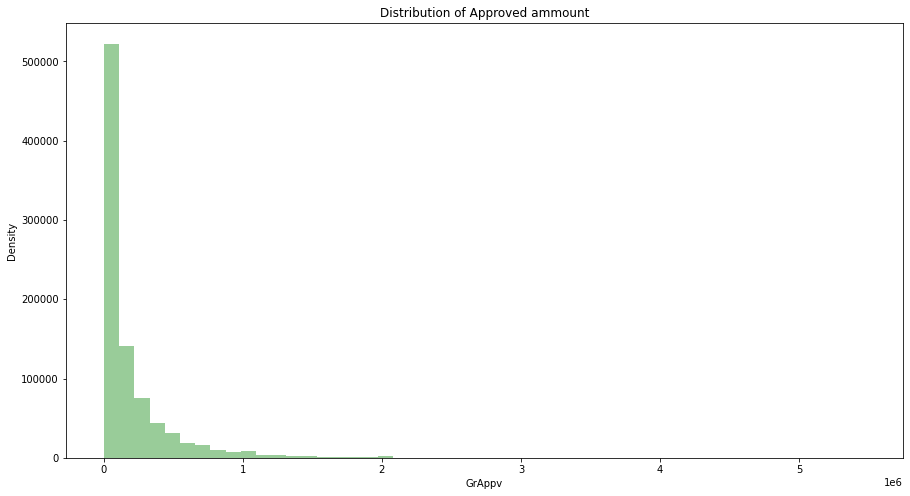

In [0]:
#As we can see, there is skewness.
plt.figure(figsize=(15, 8))
sns.distplot(credit.GrAppv, color="g", kde=False)
plt.ylabel('Density')
plt.title('Distribution of Approved ammount')
plt.show()

In [0]:
#Fix skewness of GrAppv using log
credit['GrAppv'] = np.log(credit['GrAppv']) 

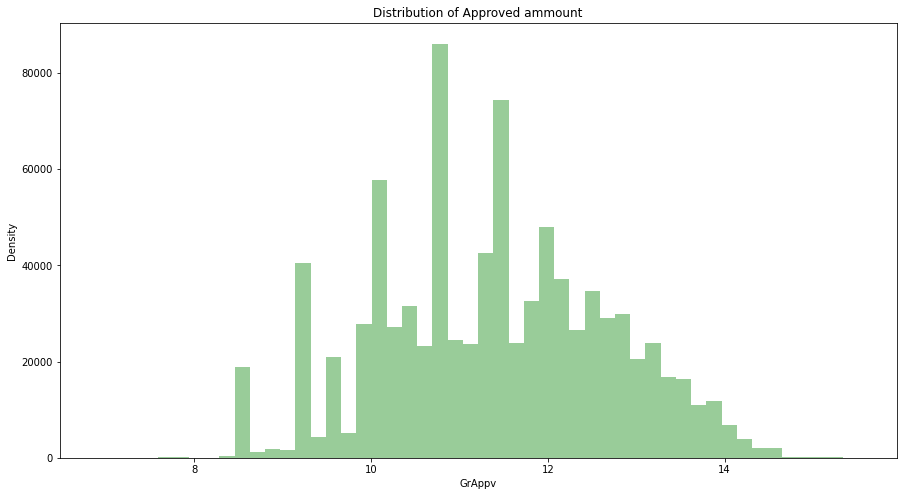

In [0]:
#As we can see, there is skewness.
plt.figure(figsize=(15, 8))
sns.distplot(credit.GrAppv, color="g", kde=False)
plt.ylabel('Density')
plt.title('Distribution of Approved ammount')
plt.show()

In [0]:
#Split data into train and test sets + label target value
from sklearn.model_selection import train_test_split
y = credit.MIS_Status
X = credit.drop(['MIS_Status'], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=0)

In [0]:
#We will apply Simple Imputer and Standart Scaler from sklearn package
from sklearn.impute import SimpleImputer 
my_imputer = SimpleImputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

In [0]:
train_X

array([[20., 52.,  1., ...,  1.,  1.,  0.],
       [ 7.,  2.,  2., ...,  1.,  1.,  0.],
       [ 2., 11.,  1., ...,  0.,  1.,  1.],
       ...,
       [ 4.,  2.,  1., ...,  1.,  1.,  0.],
       [20., 83.,  1., ...,  0.,  0.,  1.],
       [ 7.,  1.,  2., ...,  0.,  1.,  0.]])

In [0]:
test_X

array([[ 5.,  2.,  2., ...,  0.,  1.,  0.],
       [ 5.,  3.,  2., ...,  0.,  0.,  1.],
       [ 7.,  5.,  1., ...,  0.,  1.,  1.],
       ...,
       [ 7., 10.,  1., ...,  0.,  1.,  1.],
       [ 7.,  2.,  1., ...,  0.,  1.,  1.],
       [25., 18.,  1., ...,  0.,  0.,  1.]])

In [0]:
#Scaling features with Standart Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_sc =scaler.fit_transform(train_X)
test_sc = scaler.transform(test_X)

In [0]:
train_sc

array([[ 1.64486725,  0.54081168, -0.62575852, ...,  1.52820192,
         0.98088174, -1.82500764],
       [-0.31581623, -0.12536113,  1.59806055, ...,  1.52820192,
         0.98088174, -1.82500764],
       [-1.06992526, -0.00545003, -0.62575852, ..., -0.65436379,
         0.98088174,  0.54794291],
       ...,
       [-0.76828165, -0.12536113, -0.62575852, ...,  1.52820192,
         0.98088174, -1.82500764],
       [ 1.64486725,  0.95383882, -0.62575852, ..., -0.65436379,
        -1.01949089,  0.54794291],
       [-0.31581623, -0.13868459,  1.59806055, ..., -0.65436379,
         0.98088174, -1.82500764]])

In [0]:
test_sc

array([[-0.61745984, -0.12536113,  1.59806055, ..., -0.65436379,
         0.98088174, -1.82500764],
       [-0.61745984, -0.11203768,  1.59806055, ..., -0.65436379,
        -1.01949089,  0.54794291],
       [-0.31581623, -0.08539077, -0.62575852, ..., -0.65436379,
         0.98088174,  0.54794291],
       ...,
       [-0.31581623, -0.01877348, -0.62575852, ..., -0.65436379,
         0.98088174,  0.54794291],
       [-0.31581623, -0.12536113, -0.62575852, ..., -0.65436379,
         0.98088174,  0.54794291],
       [ 2.39897628,  0.08781417, -0.62575852, ..., -0.65436379,
        -1.01949089,  0.54794291]])

In [0]:
#We will train xgboost without any tunning and check results.
import xgboost as xgb
os.environ['KMP_DUPLICATE_LIB_OK']='True'
#Train the XGboost Model for Classification
#Model with default parameters
model = xgb.XGBClassifier()
train_model = model.fit(train_sc, train_y)

In [0]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
train_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
#Prediction
from sklearn.metrics import classification_report
pred = train_model.predict(test_X)
print('Model XGboost Report %r' % (classification_report(test_y, pred)))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model XGboost Report '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00     38823\n           1       0.83      1.00      0.90    184137\n\n    accuracy                           0.83    222960\n   macro avg       0.41      0.50      0.45    222960\nweighted avg       0.68      0.83      0.75    222960\n'


In [0]:
pred

array([1, 1, 1, ..., 1, 1, 1])

In [0]:
#Let's use accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy for model: %.2f" % (accuracy_score(test_y, pred) * 100))

Accuracy for model: 82.59


Voting classifiers

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [0]:
voting_clf.fit(train_sc, train_y)
y_pred = voting_clf.predict(test_X)
print(clf.__class__.__name__, accuracy_score(test_y, y_pred))

In [0]:
#from sklearn.metrics import accuracy_score

#for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
 #   clf.fit(train_sc, train_y)
  #  y_pred = clf.predict(test_X)
   # print(clf.__class__.__name__, accuracy_score(test_y, y_pred))

**Bagging ensembles**